In [29]:
import pandas as pd

df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


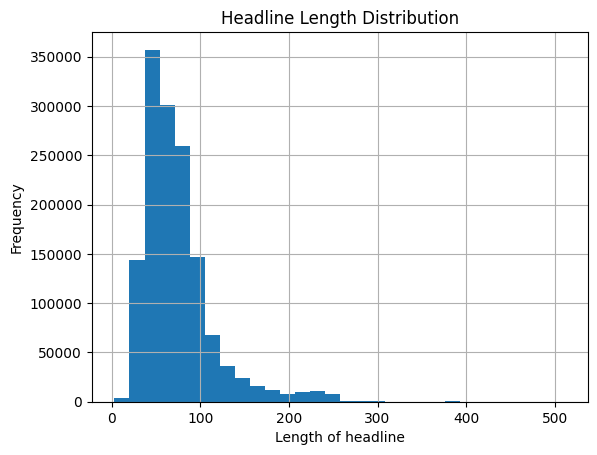

In [30]:
# Add headline length column
df['headline_length'] = df['headline'].dropna().apply(len)

# Basic stats
print(df['headline_length'].describe())

# Plot
import matplotlib.pyplot as plt
df['headline_length'].hist(bins=30)
plt.title('Headline Length Distribution')
plt.xlabel('Length of headline')
plt.ylabel('Frequency')
plt.show()


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


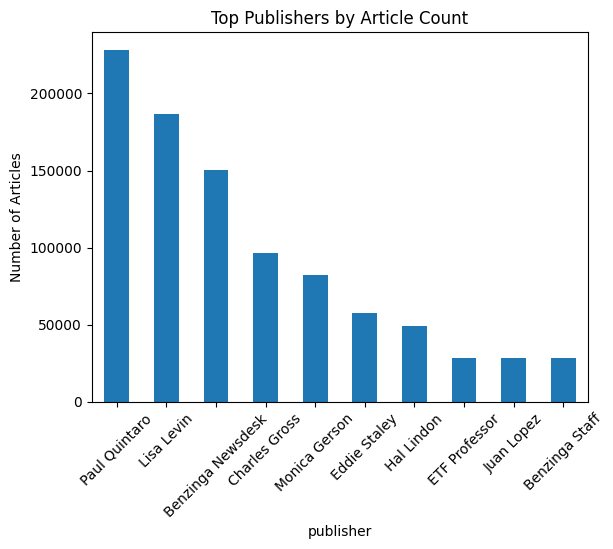

In [31]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher_counts.head(10).plot(kind='bar')
plt.title('Top Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19816\2703372112.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed')


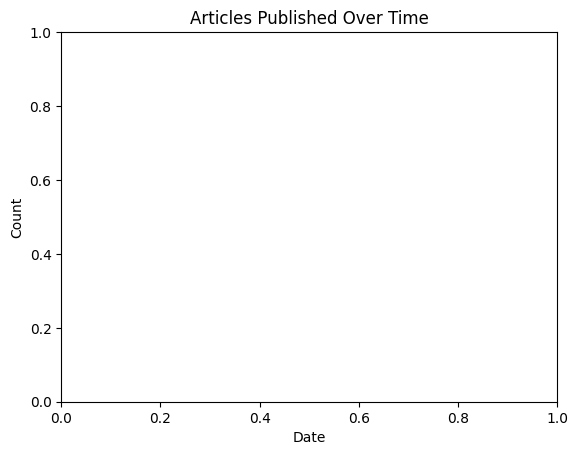

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['date'] = pd.to_datetime(df['date'], utc=True).dt.tz_convert(None)

C:\Users\user\AppData\Local\Temp\ipykernel_19816\1528506050.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\Desktop\Predicting-Price-Moves-with-News-Sentiment\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


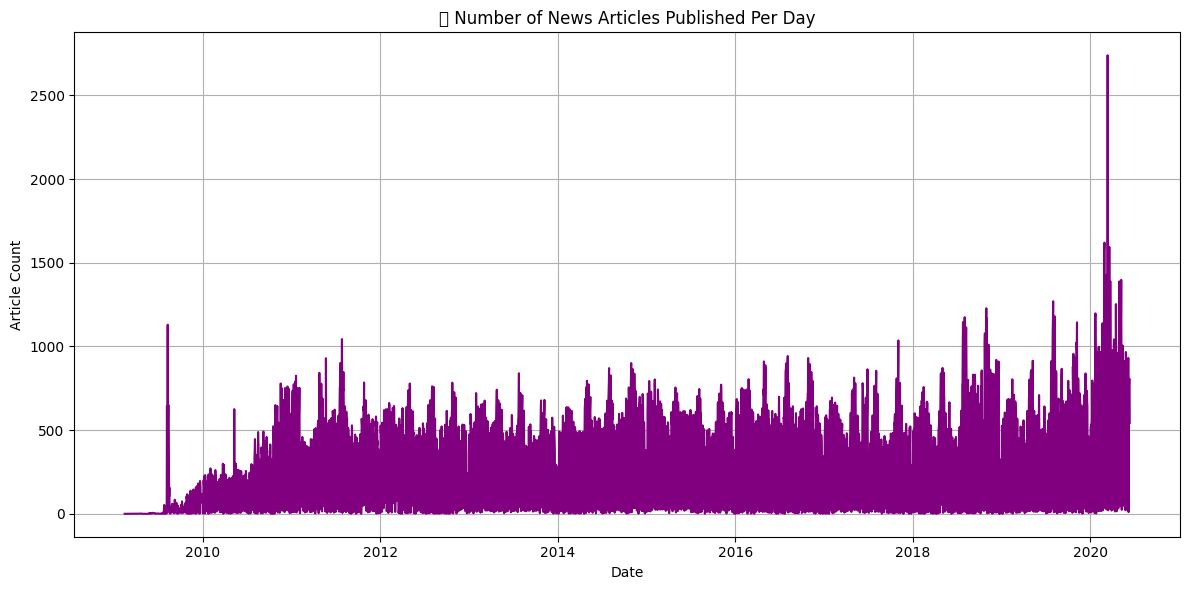

In [21]:
import matplotlib.pyplot as plt

df['date'].dt.date.value_counts().sort_index().plot(figsize=(12,6), color='purple')
plt.title('📈 Number of News Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'].dropna())
print(vectorizer.get_feature_names_out())


['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


In [34]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [terms[i] for i in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")


Topic 1: trading, vs, shares, downgrades, week, update, mid, reports, market, earnings
Topic 2: shares, buy, price, trading, pt, mid, market, announces, week, stocks
Topic 3: earnings, shares, trading, update, raises, reports, sales, eps, est, vs
Topic 4: benzinga, market, shares, update, announces, downgrades, raises, buy, price, pt
Topic 5: buy, sales, price, downgrades, mid, market, trading, benzinga, update, shares


Text(0.5, 1.0, 'Article Frequency Over Time')

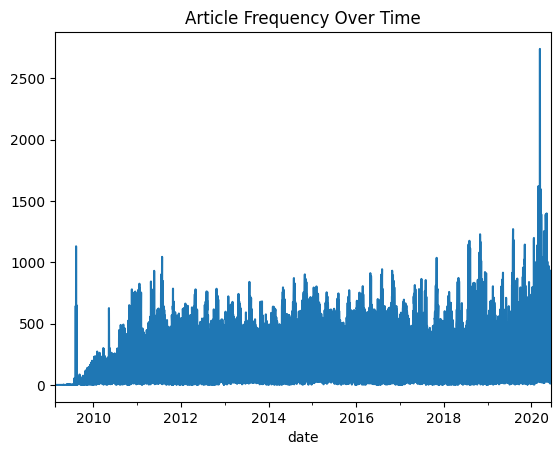

In [35]:
df.set_index('date', inplace=True)
df.resample('D').size().plot()
plt.title('Article Frequency Over Time')

Text(0.5, 0, 'Hour')

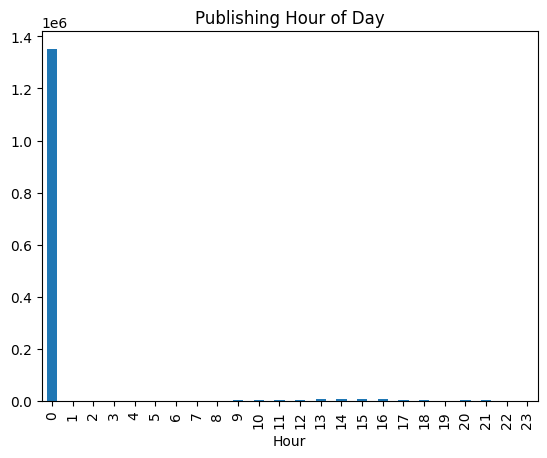

In [36]:
df['publish_hour'] = df.index.hour
df['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Publishing Hour of Day')
plt.xlabel('Hour')

Text(0.5, 1.0, 'Top Publishing Domains')

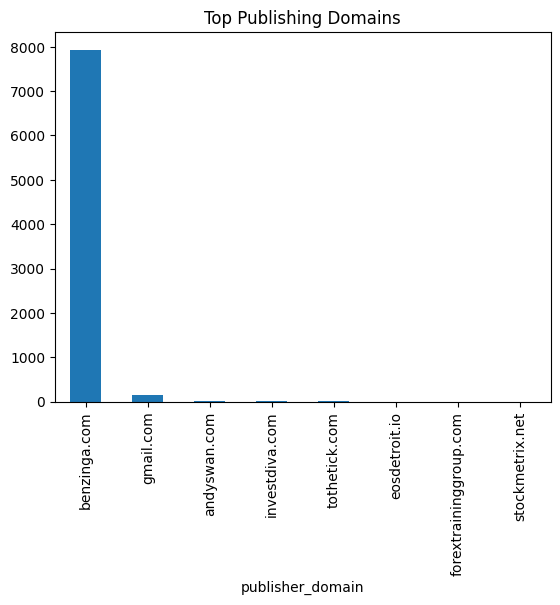

In [37]:
df['publisher_domain'] = df['publisher'].str.extract(r'@(\w+\.\w+)')  # if publisher is email
df['publisher_domain'].value_counts().head(10).plot(kind='bar')
plt.title('Top Publishing Domains')